In [1]:
# 导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib画图可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 读取数据并查看
doctor_info_df = pd.read_csv("all.csv")
doctor_info_df.drop(columns=['Unnamed: 0'], inplace=True)
doctor_info_df.head()

import dataframe_image as dfi
dfi.export(doctor_info_df.head(),'图1.png')

In [4]:
doctor_info_df.head()

,name,level,1_level_department,2_level_department,address,star,inquisition,expert_team,service_price_img,service_price_video,have_img,have_video,level_transform,hospital_level
0,郭倩倩,主治医师,中医科,中医乳腺外科,广东省中医院大学城医院,NaN,32,NaN,10.0,NaN,1,0,2,1
1,温嘉槐,主治医师,中医科,中医乳腺外科,广东省中医院大德路总院,10.0,34,NaN,30.0,NaN,1,0,2,1
2,刘鹏熙,主任医师,中医科,中医乳腺外科,广东省中医院大学城医院,9.2,169,专家团队,200.0,NaN,1,0,4,1
3,瞿文超,副主任医师,中医科,中医乳腺外科,上海中医药大学附属曙光医院东院,10.0,320,NaN,80.0,NaN,1,0,3,0
4,洪宋贞,副主任医师,中医科,中医乳腺外科,广东省中医院大德路总院,8.9,140,专家团队,100.0,NaN,1,0,3,1


# 描述性分析

In [5]:
# 数据数量
doctor_info_df.shape

(35439, 14)

## 问诊量分布

In [6]:
doctor_info_df['inquisition'].describe()

count     35439.000000
mean       1081.545529
std        9115.135967
min           0.000000
25%           3.000000
50%          27.000000
75%         208.000000
max      401660.000000
Name: inquisition, dtype: float64

In [7]:
# 问诊量最大的医生的数据
doctor_info_df[doctor_info_df['inquisition'] == doctor_info_df['inquisition'].max()]

,name,level,1_level_department,2_level_department,address,star,inquisition,expert_team,service_price_img,service_price_video,have_img,have_video,level_transform,hospital_level
24582,巫凡,主治医师,外科,泌尿外科,兴宁市妇幼保健院,10.0,401660,NaN,15.0,88.0,1,1,2,0


In [8]:
# 问诊量为0的医生的数量以及占比
print(doctor_info_df[doctor_info_df['inquisition'] == 0].shape[0])
print(doctor_info_df[doctor_info_df['inquisition'] == 0].shape[0] / doctor_info_df.shape[0])
inquision_0 = doctor_info_df[doctor_info_df['inquisition'] == 0]

4394
0.1239876971697847


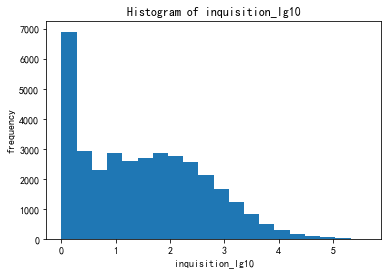

In [9]:
# 以10为底取对数后画图

# 对inquisition列不为0的数据以10为底取对数，不为0的数据继续保留
doctor_info_df['inquisition_lg10'] = doctor_info_df['inquisition'].apply(lambda x: np.log10(x) if x != 0 else x)

# 画图
plt.hist(doctor_info_df['inquisition_lg10'], bins=20)
plt.xlabel('inquisition_lg10')
plt.ylabel('frequency')
plt.title('Histogram of inquisition_lg10')
plt.show();

In [10]:
# 问诊量大于10000的数据的数量及其占比
print(doctor_info_df[doctor_info_df['inquisition'] > 10000].shape[0])
print(doctor_info_df[doctor_info_df['inquisition'] > 10000].shape[0] / doctor_info_df.shape[0])

598
0.016874065295296142


In [11]:
# 不同科室问诊量大于10000的条数及其占比
df1 = doctor_info_df[doctor_info_df['inquisition'] > 10000].groupby('2_level_department')['inquisition'].count() / doctor_info_df.groupby('2_level_department')['inquisition'].count()
df1 = df1.dropna()
df1 = df1.sort_values(ascending=False)
df1

2_level_department
普通内科      0.143608
皮肤科       0.103147
全科        0.088186
小儿内科      0.069257
妇科        0.048682
妇产科综合     0.048414
普外科       0.042328
耳鼻咽喉科     0.040280
心血管内科     0.039724
消化内科      0.039451
口腔黏膜科     0.034483
中医内科      0.033223
眼科综合      0.032258
骨科        0.031579
泌尿外科      0.030822
皮肤性病科     0.030612
口腔科综合     0.025729
呼吸内科      0.023810
精神科       0.022140
内分泌科      0.018676
感染科       0.017361
神经内科      0.015411
中西医结合科    0.013841
心理科       0.013491
肾内科       0.012195
中医男科      0.010582
儿科综合      0.009917
肿瘤内科      0.008929
中医肿瘤科     0.006928
神经外科      0.006814
整形外科      0.005025
中医神经内科    0.003868
中医呼吸科     0.003717
肛肠外科      0.003546
乳腺外科      0.003367
血液科       0.003361
中医外科      0.003322
肿瘤外科      0.003185
中医儿科      0.002132
中医心内科     0.001996
胸外科       0.001779
肝胆外科      0.001745
中医骨伤科     0.001664
中医妇产科     0.001656
Name: inquisition, dtype: float64

In [12]:
# 选出问诊量大于10000的数据
df_inquisition_10000 = doctor_info_df[doctor_info_df['inquisition'] > 10000]

# 计算其中各个科室的占比(按2级科室）
department_10000_2 = df_inquisition_10000['2_level_department'].value_counts() / df_inquisition_10000.shape[0]

# 按从大到小排序
department_10000_2 = department_10000_2.sort_values(ascending=False)

department_10000_2

普通内科      0.137124
皮肤科       0.098662
全科        0.088629
小儿内科      0.068562
妇产科综合     0.048495
普外科       0.040134
妇科        0.040134
消化内科      0.038462
耳鼻咽喉科     0.038462
心血管内科     0.038462
中医内科      0.033445
眼科综合      0.031773
泌尿外科      0.030100
骨科        0.030100
口腔科综合     0.025084
呼吸内科      0.023411
精神科       0.020067
内分泌科      0.018395
感染科       0.016722
神经内科      0.015050
中西医结合科    0.013378
心理科       0.013378
肾内科       0.011706
儿科综合      0.010033
皮肤性病科     0.010033
肿瘤内科      0.008361
神经外科      0.006689
中医肿瘤科     0.005017
整形外科      0.005017
肛肠外科      0.003344
血液科       0.003344
中医外科      0.003344
中医男科      0.003344
中医神经内科    0.003344
乳腺外科      0.003344
中医儿科      0.001672
胸外科       0.001672
肝胆外科      0.001672
口腔黏膜科     0.001672
中医骨伤科     0.001672
中医心内科     0.001672
中医妇产科     0.001672
中医呼吸科     0.001672
肿瘤外科      0.001672
Name: 2_level_department, dtype: float64

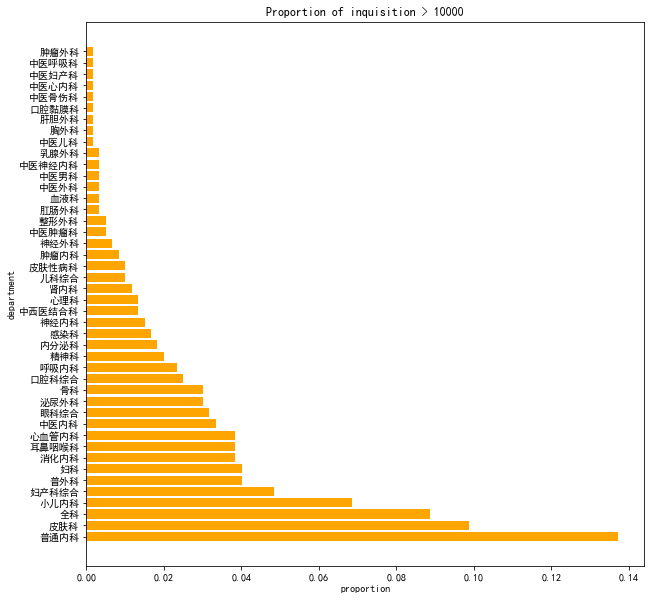

In [13]:
plt.figure(figsize=(10, 10))
plt.barh(department_10000_2.index, department_10000_2.values, color='orange')
plt.xlabel('proportion')
plt.ylabel('department')
plt.title('Proportion of inquisition > 10000')
plt.show();

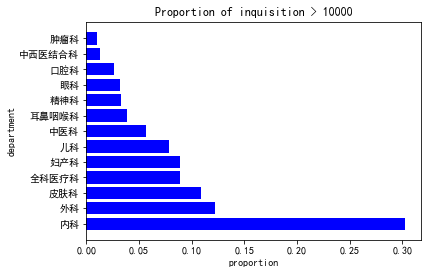

In [14]:
# 计算其中各个科室的占比(按1级科室）
department_10000_1 = df_inquisition_10000['1_level_department'].value_counts() / df_inquisition_10000.shape[0]

# 按从大到小排序
department_10000_1 = department_10000_1.sort_values(ascending=False)

plt.barh(department_10000_1.index, department_10000_1.values, color='blue')
plt.xlabel('proportion')
plt.ylabel('department')
plt.title('Proportion of inquisition > 10000')
plt.show();

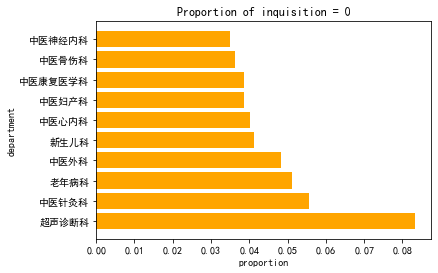

In [15]:
# 选出问诊量为0的数据
df_inquisition_0 = doctor_info_df[doctor_info_df['inquisition'] == 0]

# 计算其中各个科室的占比(按2级科室）
department_0_2 = df_inquisition_0['2_level_department'].value_counts() / df_inquisition_0.shape[0]

# 按从大到小排序
department_0_2 = department_0_2.sort_values(ascending=False)
department_0_2 = department_0_2.head(10)

plt.barh(department_0_2.index, department_0_2.values, color='orange')
plt.xlabel('proportion')
plt.ylabel('department')
plt.title('Proportion of inquisition = 0')
plt.show();

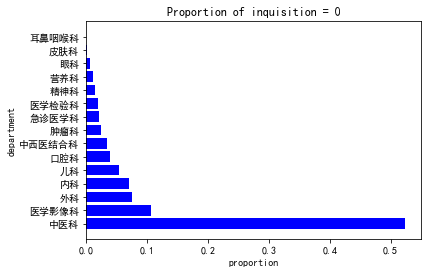

In [16]:
# 计算其中各个科室的占比(按1级科室）
department_0_1 = df_inquisition_0['1_level_department'].value_counts() / df_inquisition_0.shape[0]

# 按从大到小排序
department_0_1 = department_0_1.sort_values(ascending=False)

plt.barh(department_0_1.index, department_0_1.values, color='blue')
plt.xlabel('proportion')
plt.ylabel('department')
plt.title('Proportion of inquisition = 0')
plt.show();

## 匹配变量

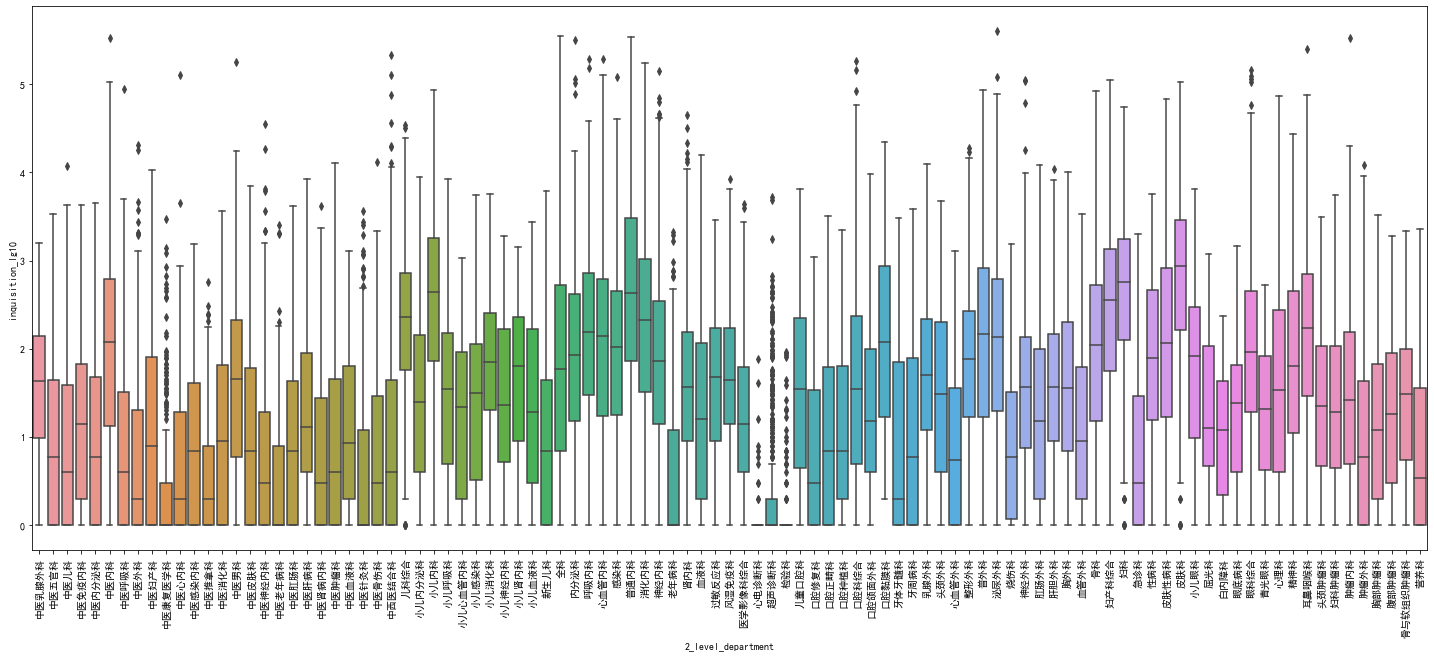

In [17]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='2_level_department', y='inquisition_lg10', data=doctor_info_df)
plt.xticks(rotation=90)
plt.show();

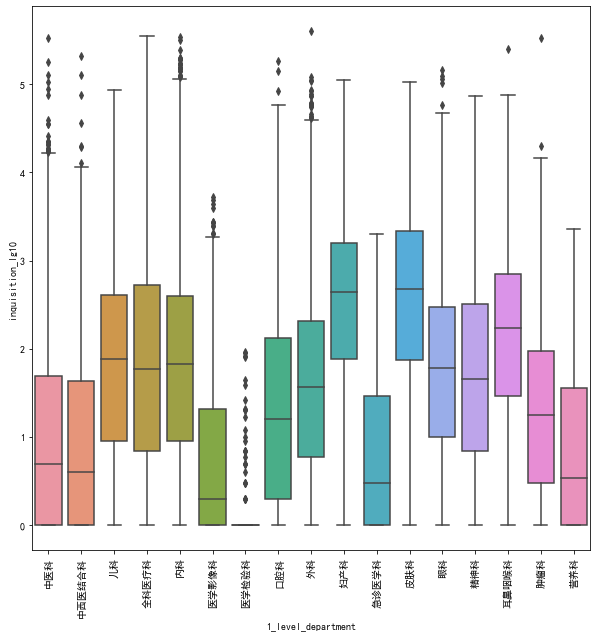

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='1_level_department', y='inquisition_lg10', data=doctor_info_df)
plt.xticks(rotation=90)
plt.show();

In [19]:
# 提供不同服务的人数
doctor_info_df.groupby(['have_img', 'have_video']).size()

have_img  have_video
0         0              3773
          1               364
1         0             22786
          1              8516
dtype: int64

In [20]:
# 生成新的service列
doctor_info_df['service'] = doctor_info_df.apply(lambda x: '未提供服务' if x['have_img'] == 0 and x['have_video'] == 0 else 
                         ('提供两种服务' if x['have_img'] == 1 and x['have_video'] == 1 else 
                         ('提供图文问诊服务' if x['have_img'] == 1 and x['have_video'] == 0 else 
                          '提供视话问诊服务')), 
                         axis=1)

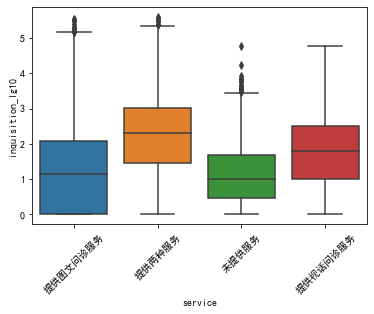

In [21]:
sns.boxplot(x='service', y='inquisition_lg10', data=doctor_info_df)
plt.xticks(rotation=45)
plt.show();

## 能力变量

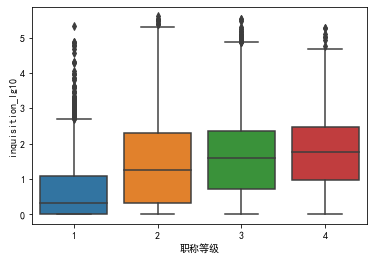

In [22]:
sns.boxplot(x='level_transform', y='inquisition_lg10', data=doctor_info_df)
plt.xticks(rotation=0)
plt.xlabel('职称等级')
plt.show();

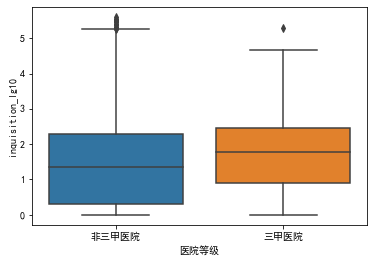

In [23]:
sns.boxplot(x='hospital_level', y='inquisition_lg10', data=doctor_info_df)
plt.xticks([0, 1], ['非三甲医院', '三甲医院'])
plt.xlabel('医院等级')
plt.show();

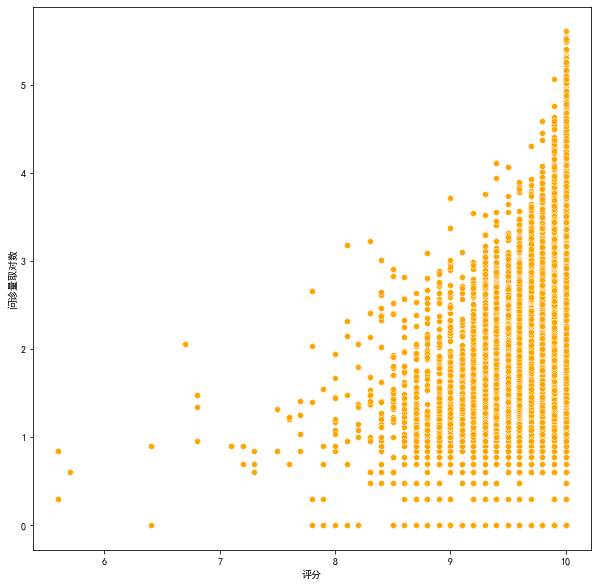

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='star', y='inquisition_lg10', data=doctor_info_df, color="orange")
plt.xlabel('评分')
plt.ylabel('问诊量取对数')
plt.show();

In [25]:
# 查看star值为10的数据的数量以及占比
doctor_info_df[doctor_info_df['star'] == 10].shape[0], doctor_info_df[doctor_info_df['star'] == 10].shape[0] / doctor_info_df.shape[0]

(13737, 0.3876238042834166)

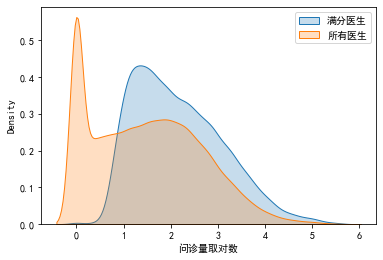

In [26]:
# 根据star列为10和所有数据制作inquisition列的密度分布图
sns.kdeplot(doctor_info_df[doctor_info_df['star'] == 10]['inquisition_lg10'], shade=True, label='满分医生')
sns.kdeplot(doctor_info_df['inquisition_lg10'], shade=True, label='所有医生')
plt.xlabel('问诊量取对数')
plt.legend(loc='upper right')
plt.show();

## 经济变量

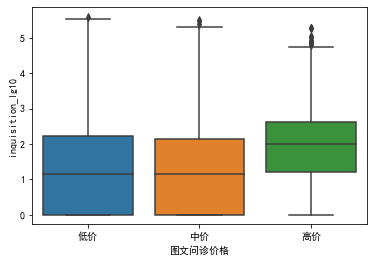

In [27]:
# 将service_price_img列按值的大小平均分为三组，分别为“低价”、“中价”和“高价”，制作箱形图
doctor_info_df['service_price_img_level'] = pd.qcut(doctor_info_df['service_price_img'], 3, labels=['低价', '中价', '高价'])
sns.boxplot(x='service_price_img_level', y='inquisition_lg10', data=doctor_info_df)
plt.xlabel('图文问诊价格')
plt.show();

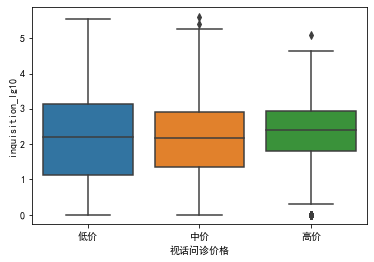

In [28]:
# 将service_price_video列按值的大小平均分为三组，分别为“低价”、“中价”和“高价”，制作箱形图
doctor_info_df['service_price_video_level'] = pd.qcut(doctor_info_df['service_price_video'], 3, labels=['低价', '中价', '高价'])
sns.boxplot(x='service_price_video_level', y='inquisition_lg10', data=doctor_info_df)
plt.xlabel('视话问诊价格')
plt.show();

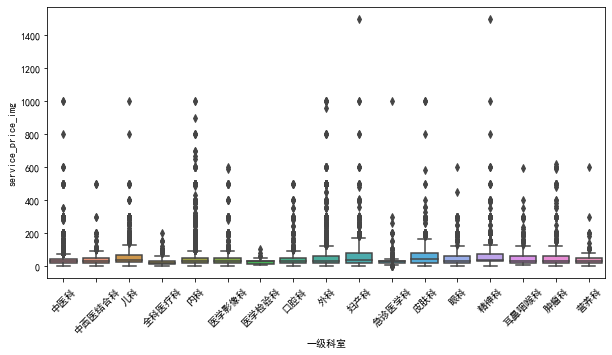

In [29]:
# 根据不同科室的service_price_img列的值制作箱型图
plt.figure(figsize=(10, 5))
sns.boxplot(x='1_level_department', y='service_price_img', data=doctor_info_df)
plt.xlabel('一级科室')
plt.xticks(rotation=45)
plt.show();

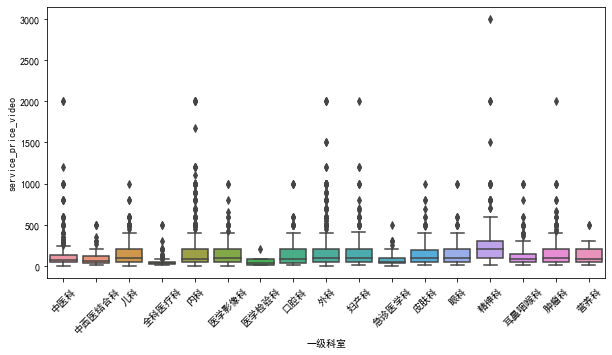

In [30]:
# 根据不同科室的service_price_video列的值制作箱型图
plt.figure(figsize=(10, 5))
sns.boxplot(x='1_level_department', y='service_price_video', data=doctor_info_df)
plt.xlabel('一级科室')
plt.xticks(rotation=45)
plt.show();

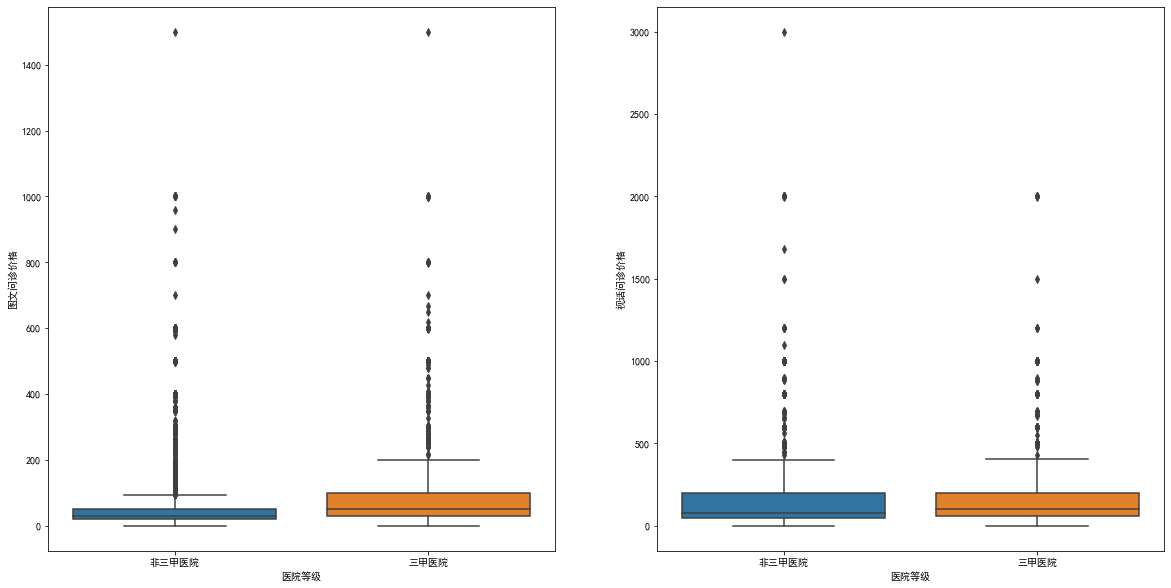

In [31]:
# 根据是否为三甲医院的价格制作箱型图
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='hospital_level', y='service_price_img', data=doctor_info_df, ax=axes[0])
axes[0].set_ylabel('图文问诊价格')
axes[0].set_xticks([0, 1], ['非三甲医院', '三甲医院'])
axes[0].set_xlabel('医院等级')
sns.boxplot(x='hospital_level', y='service_price_video', data=doctor_info_df, ax=axes[1])
axes[1].set_ylabel('视话问诊价格')
axes[1].set_xticks([0, 1], ['非三甲医院', '三甲医院'])
axes[1].set_xlabel('医院等级')
plt.show();

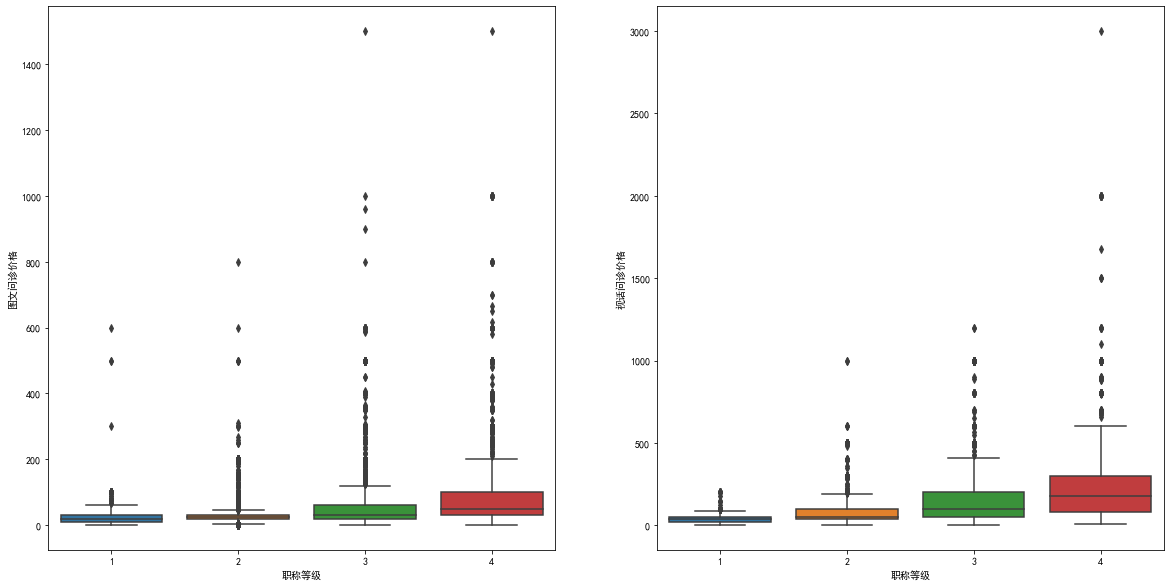

In [32]:
# 根据医生等级制作箱型图
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='level_transform', y='service_price_img', data=doctor_info_df, ax=axes[0])
axes[0].set_ylabel('图文问诊价格')
axes[0].set_xlabel('职称等级')
sns.boxplot(x='level_transform', y='service_price_video', data=doctor_info_df, ax=axes[1])
axes[1].set_ylabel('视话问诊价格')
axes[1].set_xlabel('职称等级')
plt.show();

# 模型构建

## 数据处理

In [45]:
# 赋值一个新的数据集
df_new = doctor_info_df.copy()

# 去空值
df_new = df_new.dropna(subset=['inquisition', 'have_img', 'have_video', 'star'])

# 去除后的数量
doctor_info_df.shape[0], df_new.shape[0]

(35439, 22156)

In [46]:
# 查看剔除的数据
doctor_info_df[doctor_info_df['inquisition'].isnull() | 
               doctor_info_df['have_img'].isnull() | 
               doctor_info_df['have_video'].isnull() | 
               doctor_info_df['star'].isnull()].head()

,name,level,1_level_department,2_level_department,address,star,inquisition,expert_team,service_price_img,service_price_video,have_img,have_video,level_transform,hospital_level,inquisition_lg10,service,service_price_img_level,service_price_video_level
0,郭倩倩,主治医师,中医科,中医乳腺外科,广东省中医院大学城医院,NaN,32,NaN,10.0,NaN,1,0,2,1,1.505150,提供图文问诊服务,低价,NaN
15,康梦玲,住院医师,中医科,中医乳腺外科,广东省中医院大学城医院,NaN,58,NaN,30.0,NaN,1,0,1,1,1.763428,提供图文问诊服务,中价,NaN
24,叶玲玲,住院医师,中医科,中医乳腺外科,广东省中医院大学城医院,NaN,7,NaN,20.0,NaN,1,0,1,1,0.845098,提供图文问诊服务,低价,NaN
32,何嘉发,住院医师,中医科,中医乳腺外科,广东省中医院大学城医院,NaN,5,NaN,20.0,NaN,1,0,1,1,0.698970,提供图文问诊服务,低价,NaN
45,文灼彬,主治医师,中医科,中医乳腺外科,广东省中医院二沙岛分院,NaN,33,NaN,10.0,NaN,1,0,2,1,1.518514,提供图文问诊服务,低价,NaN


In [48]:
# 样本离散化
df_new['inquisition_level'] = df_new['inquisition'].apply(lambda x: '达到' if x >= df_new['inquisition'].median() else '未达到')
df_new.head()

,name,level,1_level_department,2_level_department,address,star,inquisition,expert_team,service_price_img,service_price_video,have_img,have_video,level_transform,hospital_level,inquisition_lg10,service,service_price_img_level,service_price_video_level,inquisition_level
1,温嘉槐,主治医师,中医科,中医乳腺外科,广东省中医院大德路总院,10.0,34,NaN,30.0,NaN,1,0,2,1,1.531479,提供图文问诊服务,中价,NaN,2
2,刘鹏熙,主任医师,中医科,中医乳腺外科,广东省中医院大学城医院,9.2,169,专家团队,200.0,NaN,1,0,4,1,2.227887,提供图文问诊服务,高价,NaN,1
3,瞿文超,副主任医师,中医科,中医乳腺外科,上海中医药大学附属曙光医院东院,10.0,320,NaN,80.0,NaN,1,0,3,0,2.505150,提供图文问诊服务,高价,NaN,1
4,洪宋贞,副主任医师,中医科,中医乳腺外科,广东省中医院大德路总院,8.9,140,专家团队,100.0,NaN,1,0,3,1,2.146128,提供图文问诊服务,高价,NaN,1
5,陈莉颖,副主任医师,中医科,中医乳腺外科,上海中医药大学附属龙华医院,9.9,198,NaN,100.0,150.0,1,1,3,0,2.296665,提供两种服务,高价,高价,1


In [51]:
# 数据还原
df_new['hospital_level'] = df_new['hospital_level'].apply(lambda x: '初级' if x == 1 else 
                                                          ('中级' if x == 2 else 
                                                           ('副高' if x == 3 else '高级')))
df_new['have_img'] = df_new['have_img'].apply(lambda x: '无' if x == 0 else '有')
df_new['have_video'] = df_new['have_video'].apply(lambda x: '无' if x == 0 else '有')
df_new['hospital_level'] = df_new['hospital_level'].apply(lambda x: '三甲医院' if x == 1 else '非三甲医院')

In [54]:
# 构造建模使用的数据集
df_modle = df_new[['1_level_department', '2_level_department', 'have_img', 'have_video', 'hospital_level', 'level_transform', 'star', 'service_price_img_level', 'service_price_video_level', 'inquisition_level']]
df_modle.head(5)

,1_level_department,2_level_department,have_img,have_video,hospital_level,level_transform,star,service_price_img_level,service_price_video_level,inquisition_level
1,中医科,中医乳腺外科,有,无,非三甲医院,2,10.0,中价,NaN,2
2,中医科,中医乳腺外科,有,无,非三甲医院,4,9.2,高价,NaN,1
3,中医科,中医乳腺外科,有,无,非三甲医院,3,10.0,高价,NaN,1
4,中医科,中医乳腺外科,有,无,非三甲医院,3,8.9,高价,NaN,1
5,中医科,中医乳腺外科,有,有,非三甲医院,3,9.9,高价,高价,1


In [57]:
# 将df_modle中的定类数据进行哑变量处理
df_1 = pd.get_dummies(df_modle, columns=['1_level_department', 
                                             '2_level_department', 
                                             'have_img', 
                                             'have_video', 
                                             'hospital_level', 
                                             'level_transform', 
                                             'service_price_img_level', 
                                             'service_price_video_level'])
df_1

,star,inquisition_level,1_level_department_中医科,1_level_department_中西医结合科,1_level_department_儿科,1_level_department_全科医疗科,1_level_department_内科,1_level_department_医学影像科,1_level_department_医学检验科,1_level_department_口腔科,...,level_transform_1,level_transform_2,level_transform_3,level_transform_4,service_price_img_level_低价,service_price_img_level_中价,service_price_img_level_高价,service_price_video_level_低价,service_price_video_level_中价,service_price_video_level_高价
1,10.0,2,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,9.2,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,10.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,8.9,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,9.9,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35415,10.0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35418,10.0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35421,8.6,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35425,10.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_2 = 

In [76]:
df_modle.to_csv("all_new.csv")

## 建模

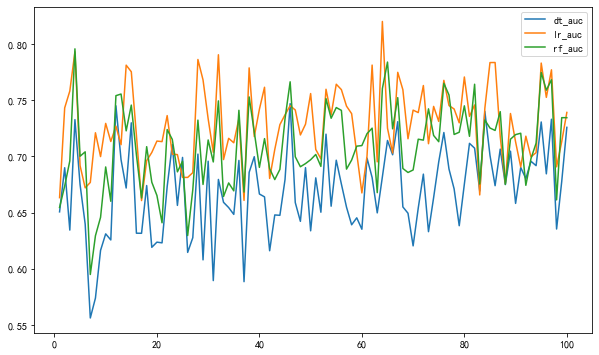

In [60]:
# auc数值挑选模型
# 将df_new按照8:2比例划分为训练集与测试集，进行100次交叉检验，获得决策树模型、逻辑回归模型和随机森林模型在测试集上的AUC数值。
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# 将df_new按照8:2比例划分为训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(df_1.drop(['inquisition_level'], axis=1), 
                                                    df_1['inquisition_level'], test_size=0.2, random_state=0)

# 定义决策树模型
dt = DecisionTreeClassifier()
# 定义逻辑回归模型
lr = LogisticRegression(max_iter=3000)
# 定义随机森林模型
rf = RandomForestClassifier()

# 进行100次交叉检验，获得决策树模型、逻辑回归模型和随机森林模型在测试集上的AUC数值
dt_auc = cross_val_score(dt, X_train, y_train, cv=100, scoring='roc_auc')

lr_auc = cross_val_score(lr, X_train, y_train, cv=100, scoring='roc_auc')

rf_auc = cross_val_score(rf, X_train, y_train, cv=100, scoring='roc_auc')

# 将决策树模型、逻辑回归模型和随机森林模型在测试集上的AUC数值绘图表示
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), dt_auc, label='dt_auc')
plt.plot(range(1, 101), lr_auc, label='lr_auc')
plt.plot(range(1, 101), rf_auc, label='rf_auc')
plt.legend()
plt.show();

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


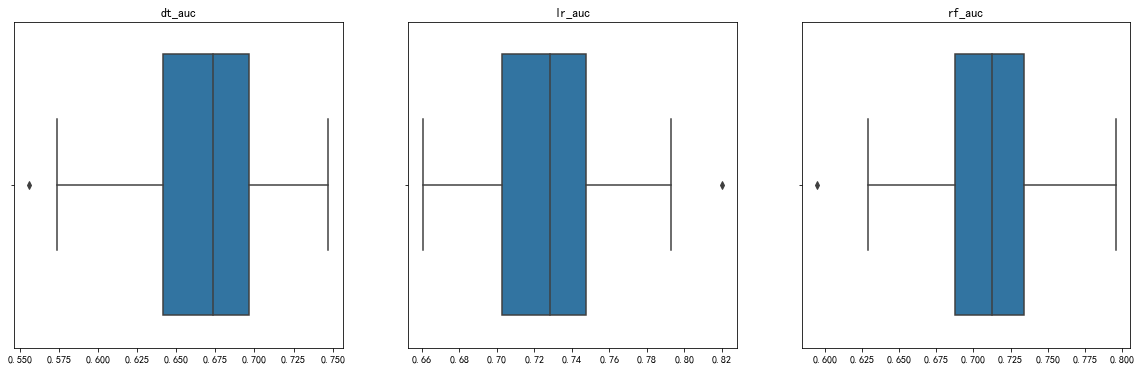

In [77]:
# 绘制AUC值的箱线图
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(dt_auc, ax=axes[0])
sns.boxplot(lr_auc, ax=axes[1])
sns.boxplot(rf_auc, ax=axes[2])
axes[0].set_title('dt_auc')
axes[1].set_title('lr_auc')
axes[2].set_title('rf_auc')
plt.show();

[2.39427756e-01 9.78019591e-03 2.30619065e-03 6.92109026e-03
 2.80719199e-03 7.72267509e-03 5.77860755e-03 1.70066054e-04
 4.71397624e-03 7.90198243e-03 1.39534514e-02 2.65605814e-03
 9.01922530e-03 3.93161442e-03 4.15178714e-03 3.62868510e-03
 5.17159917e-03 1.55078975e-03 2.69251051e-03 4.17992012e-03
 4.29769562e-03 2.90317510e-03 3.29845324e-03 7.59245863e-03
 3.34759243e-03 4.87692378e-03 5.01336220e-03 1.94082737e-03
 3.97070026e-03 1.54001186e-03 1.96310834e-03 4.98626538e-03
 3.97018059e-03 4.83528976e-03 3.74030892e-03 7.43116859e-04
 4.10276558e-03 1.85952397e-03 2.56690494e-03 3.75317753e-03
 1.19856525e-03 2.92945369e-03 5.05524667e-03 2.37227524e-03
 6.56961993e-03 6.10226765e-03 2.13987415e-03 2.92016002e-03
 4.53866881e-03 3.77683090e-03 1.81123721e-03 2.60627741e-03
 1.03927625e-03 3.99462857e-03 3.24698651e-03 7.31117167e-04
 6.85165235e-03 2.54995678e-03 1.31736596e-03 4.90881570e-03
 6.43395368e-03 3.29522183e-03 2.36428747e-03 1.03881853e-02
 2.74571692e-03 1.803578

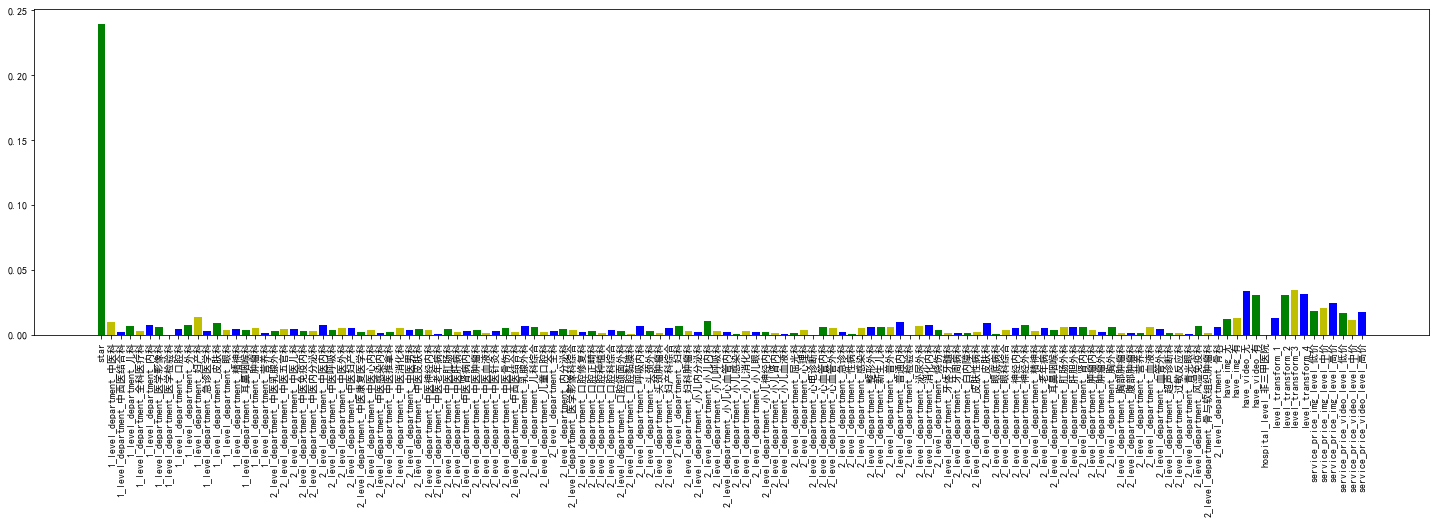

In [70]:
# 输出随机森林模型的特征重要性并画柱状图
rf.fit(X_train, y_train)
print(rf.feature_importances_)
plt.figure(figsize=(25, 6))
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.xticks(range(len(rf.feature_importances_)), df_1.drop('inquisition_level', axis=1).columns, rotation=90)
# 每个柱子颜色不同
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_, color=['g','y','b'])
plt.show();

In [78]:
# 随机森林模型准确率
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.6653880866425993


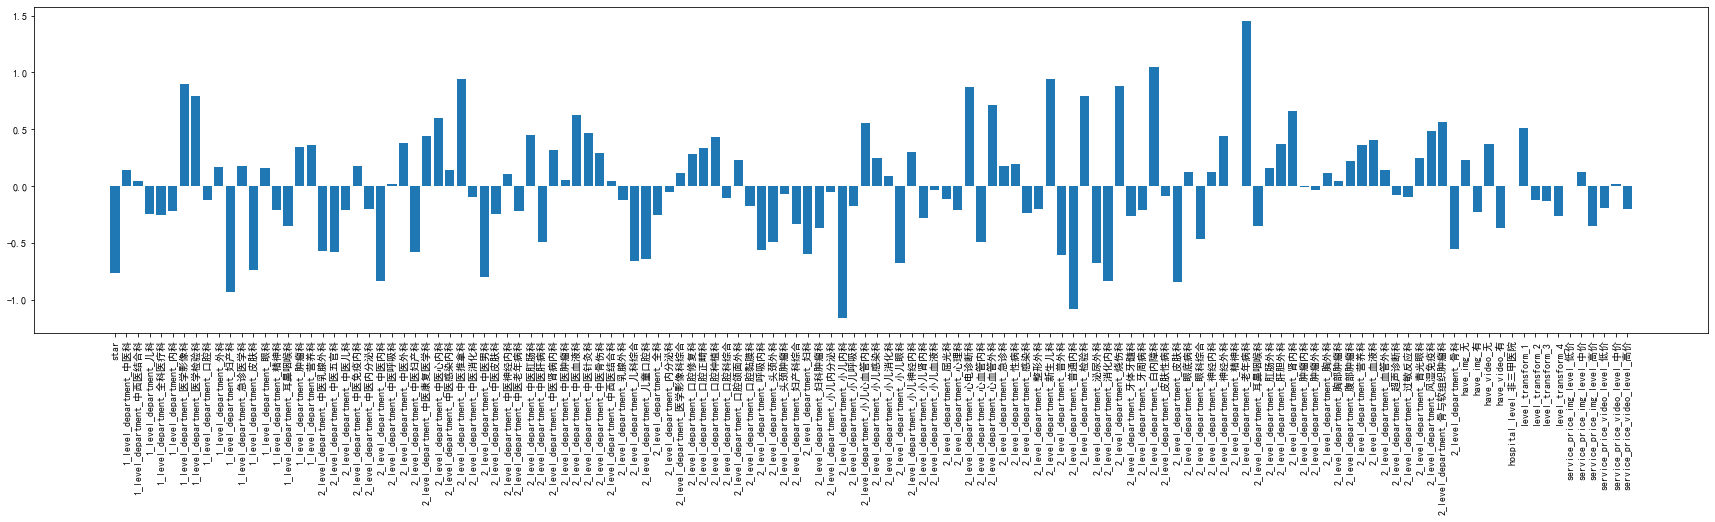

In [82]:
# 利用逻辑回归模型判断特征的重要性并绘图
lr.fit(X_train, y_train)
lr.coef_
plt.figure(figsize=(30, 6))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.xticks(range(len(lr.coef_[0])), X_train.columns, rotation=90)
plt.show();